In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
# Load the data
data = pd.read_csv('tips (data for regression problem).csv')

# Display the first few rows
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


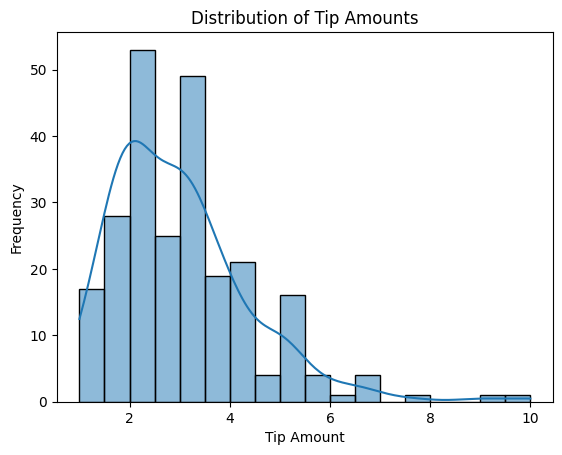

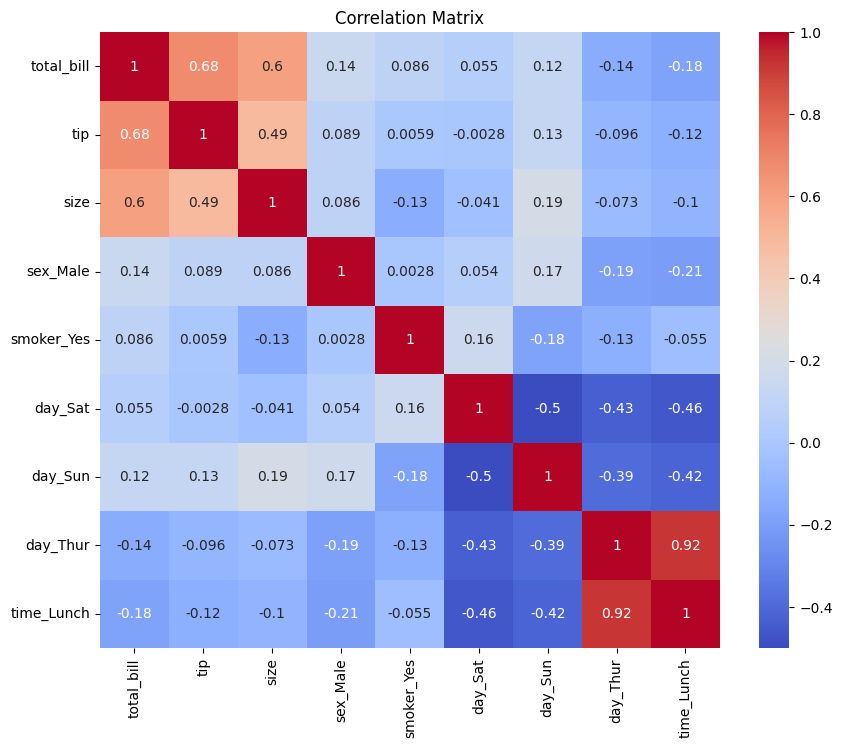

In [9]:
# Check for missing values and data types
print(data.info())
print(data.describe())

# Encode categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

# Visualize the distribution of tips
sns.histplot(data['tip'], kde=True)
plt.title('Distribution of Tip Amounts')
plt.xlabel('Tip Amount')
plt.ylabel('Frequency')
plt.show()

# Visualize correlations between features and the target variable
plt.figure(figsize=(10, 8))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Split Data into Train and Test Sets

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assume data is loaded into 'data'
# Encode categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

# Separate features and target variable
X = data_encoded.drop('tip', axis=1)  # Assuming 'tip' is the target column
y = data_encoded['tip']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluation Metrics
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results:")
print(f"RMSE: {rmse_lr}")
print(f"MAE: {mae_lr}")
print(f"R2: {r2_lr}")


Linear Regression Results:
RMSE: 0.838663580790063
MAE: 0.6671331480264893
R2: 0.43730181943482505


d:\DAI-101_Assignments\dai\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Ridge Regression

In [18]:
from sklearn.linear_model import Ridge

# Ridge Regression Model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Evaluation Metrics
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Results:")
print(f"RMSE: {rmse_ridge}")
print(f"MAE: {mae_ridge}")
print(f"R2: {r2_ridge}")


Ridge Regression Results:
RMSE: 0.8371067562274285
MAE: 0.6665379965588627
R2: 0.4393889716178486


d:\DAI-101_Assignments\dai\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Lasso Regression 

In [19]:
from sklearn.linear_model import Lasso

# Lasso Regression Model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Evaluation Metrics
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression Results:")
print(f"RMSE: {rmse_lasso}")
print(f"MAE: {mae_lasso}")
print(f"R2: {r2_lasso}")


Lasso Regression Results:
RMSE: 0.768669542129225
MAE: 0.6374841046500827
R2: 0.5273068720881755


d:\DAI-101_Assignments\dai\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Decision Tree Regression

In [20]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regressor Model
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluation Metrics
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Regression Results:")
print(f"RMSE: {rmse_dt}")
print(f"MAE: {mae_dt}")
print(f"R2: {r2_dt}")


Decision Tree Regression Results:
RMSE: 0.9214066254399883
MAE: 0.6905450649124119
R2: 0.32079229446702484


d:\DAI-101_Assignments\dai\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Random Forest Regression

In [21]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation Metrics
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Results:")
print(f"RMSE: {rmse_rf}")
print(f"MAE: {mae_rf}")
print(f"R2: {r2_rf}")


Random Forest Regression Results:
RMSE: 0.9589953153680993
MAE: 0.7557163265306125
R2: 0.2642455218065466


d:\DAI-101_Assignments\dai\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Support Vector Regression

In [22]:
from sklearn.svm import SVR

# Support Vector Regressor Model
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

# Evaluation Metrics
rmse_svr = mean_squared_error(y_test, y_pred_svr, squared=False)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Support Vector Regression Results:")
print(f"RMSE: {rmse_svr}")
print(f"MAE: {mae_svr}")
print(f"R2: {r2_svr}")


Support Vector Regression Results:
RMSE: 0.8077459029068342
MAE: 0.648420983896765
R2: 0.47802527943520123


d:\DAI-101_Assignments\dai\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## K-Nearest Neighbors Regression

In [23]:
from sklearn.neighbors import KNeighborsRegressor

# K-Nearest Neighbors Regressor Model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluation Metrics
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("K-Nearest Neighbors Regression Results:")
print(f"RMSE: {rmse_knn}")
print(f"MAE: {mae_knn}")
print(f"R2: {r2_knn}")


K-Nearest Neighbors Regression Results:
RMSE: 0.9361477294896203
MAE: 0.718857142857143
R2: 0.29888587066985495


d:\DAI-101_Assignments\dai\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Model Comparision Visualization

C:\Users\riyan\AppData\Local\Temp\ipykernel_6228\117503070.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=results_df, palette='viridis')


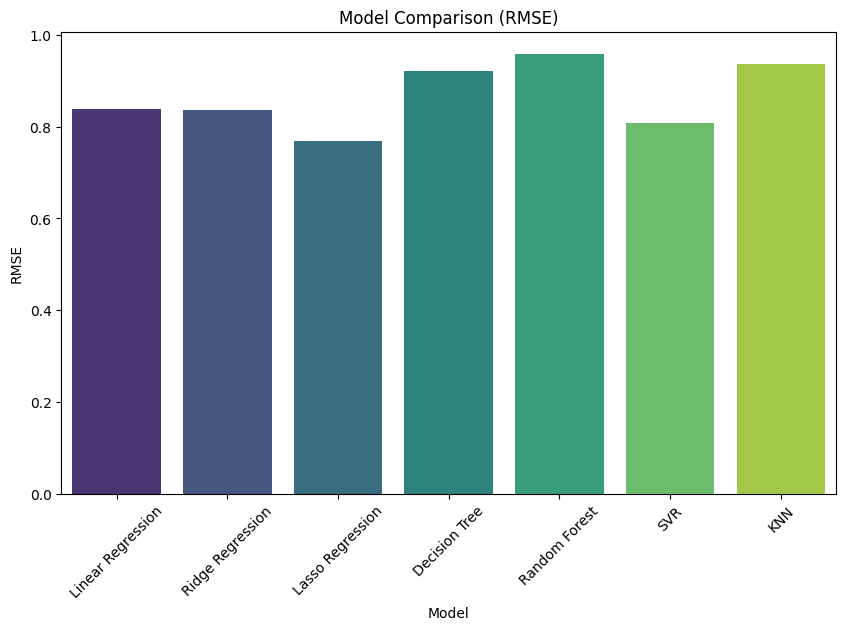

C:\Users\riyan\AppData\Local\Temp\ipykernel_6228\117503070.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2', data=results_df, palette='coolwarm')


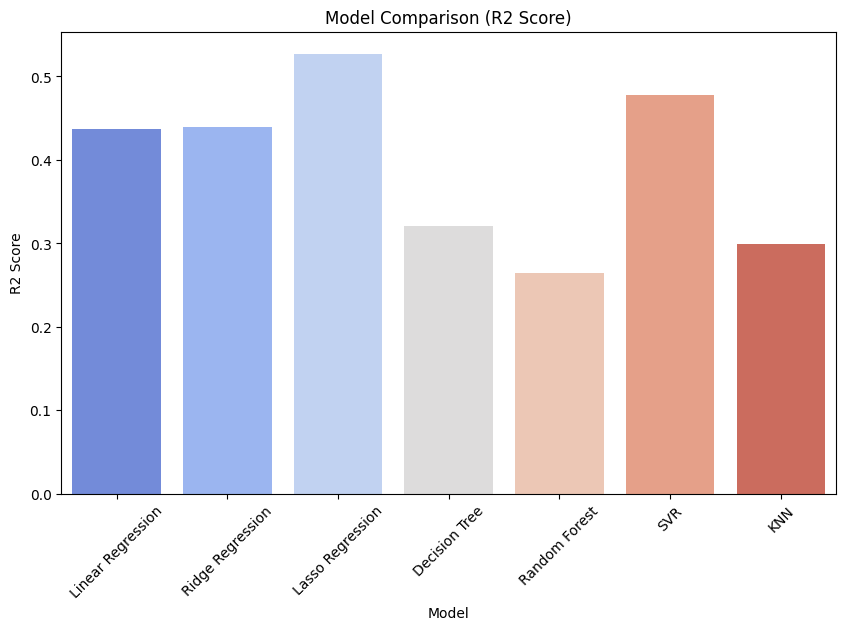

In [24]:
# Collect the results
results = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest', 'SVR', 'KNN'],
    'RMSE': [rmse_lr, rmse_ridge, rmse_lasso, rmse_dt, rmse_rf, rmse_svr, rmse_knn],
    'R2': [r2_lr, r2_ridge, r2_lasso, r2_dt, r2_rf, r2_svr, r2_knn]
}

results_df = pd.DataFrame(results)

# Plot RMSE Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='RMSE', data=results_df, palette='viridis')
plt.title('Model Comparison (RMSE)')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

# Plot R2 Score Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R2', data=results_df, palette='coolwarm')
plt.title('Model Comparison (R2 Score)')
plt.ylabel('R2 Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()


Linear Regression Coefficients:
      Feature  Coefficient
1        size     0.233484
7  time_Lunch     0.094957
0  total_bill     0.094700
2    sex_Male     0.028819
5     day_Sun    -0.050793
6    day_Thur    -0.179721
4     day_Sat    -0.185785
3  smoker_Yes    -0.192353


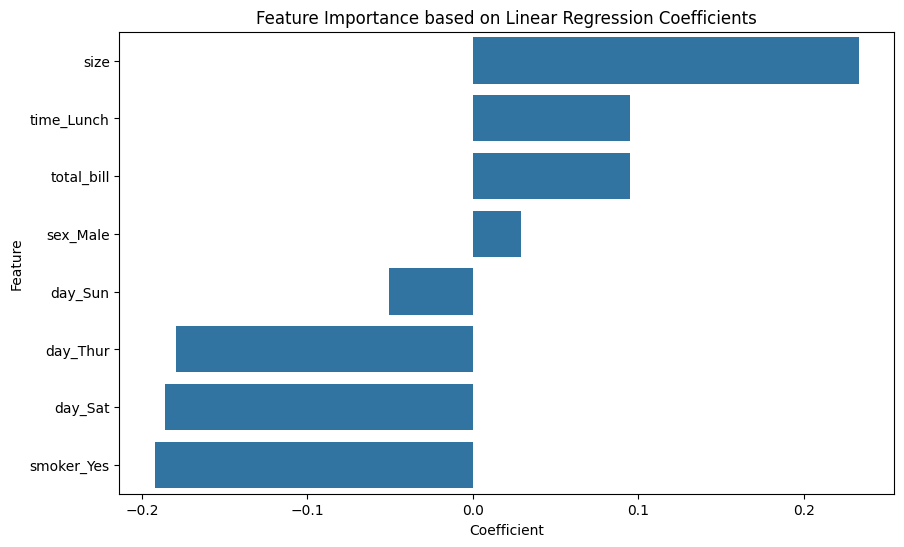

In [25]:
from sklearn.linear_model import LinearRegression

# Fit a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Get feature names and corresponding coefficients
features = X.columns
coefficients = lr_model.coef_

# Combine feature names and coefficients into a DataFrame
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

print("Linear Regression Coefficients:")
print(coef_df)

# Plot coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Feature Importance based on Linear Regression Coefficients')
plt.show()


Feature Importances from Random Forest:
      Feature  Importance
0  total_bill    0.767043
3  smoker_Yes    0.069417
1        size    0.058045
4     day_Sat    0.030292
5     day_Sun    0.025223
2    sex_Male    0.025187
7  time_Lunch    0.012975
6    day_Thur    0.011818


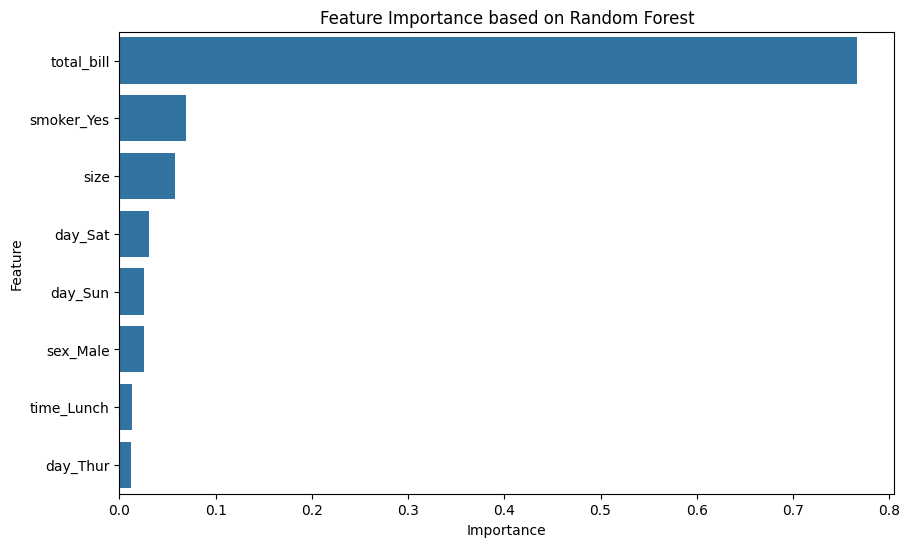

In [26]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Combine feature names and importances into a DataFrame
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances from Random Forest:")
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance based on Random Forest')
plt.show()


## Scatter Plot

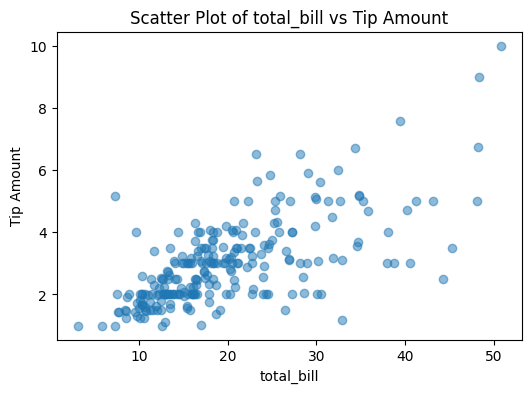

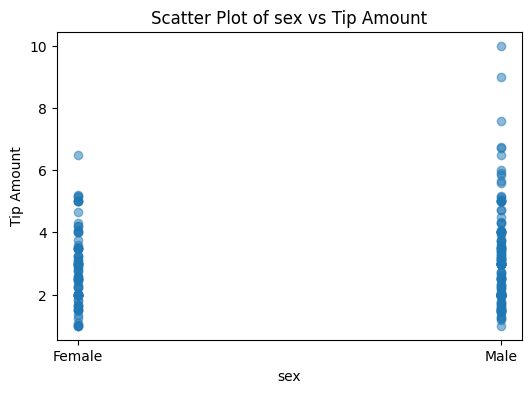

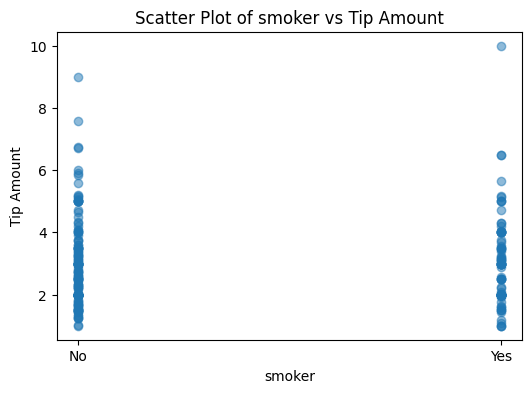

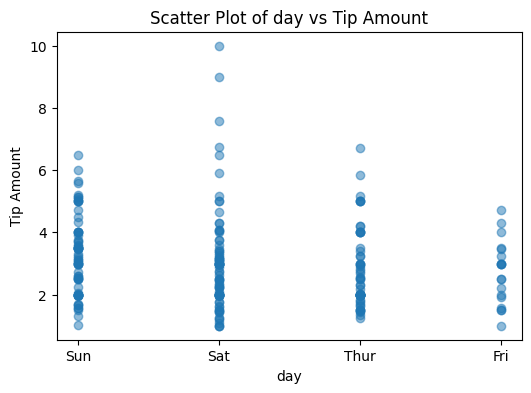

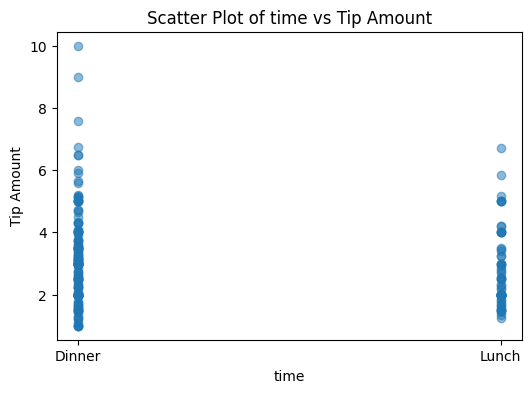

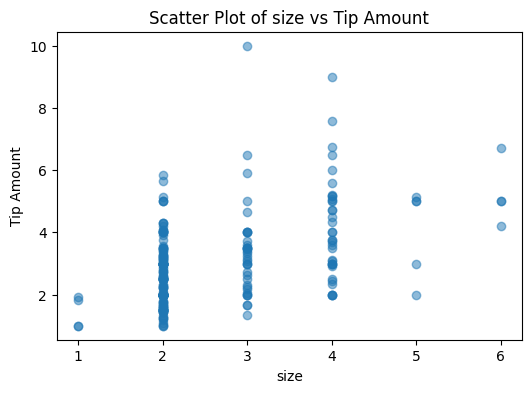

In [29]:
# Scatter plots for each predictor with the target variable (tip_amount)
predictors = [col for col in data.columns if col != 'tip']
for predictor in predictors:
    plt.figure(figsize=(6, 4))
    plt.scatter(data[predictor], data['tip'], alpha=0.5)
    plt.xlabel(predictor)
    plt.ylabel('Tip Amount')
    plt.title(f'Scatter Plot of {predictor} vs Tip Amount')
    plt.show()


## Pair Plot for Multiple Features

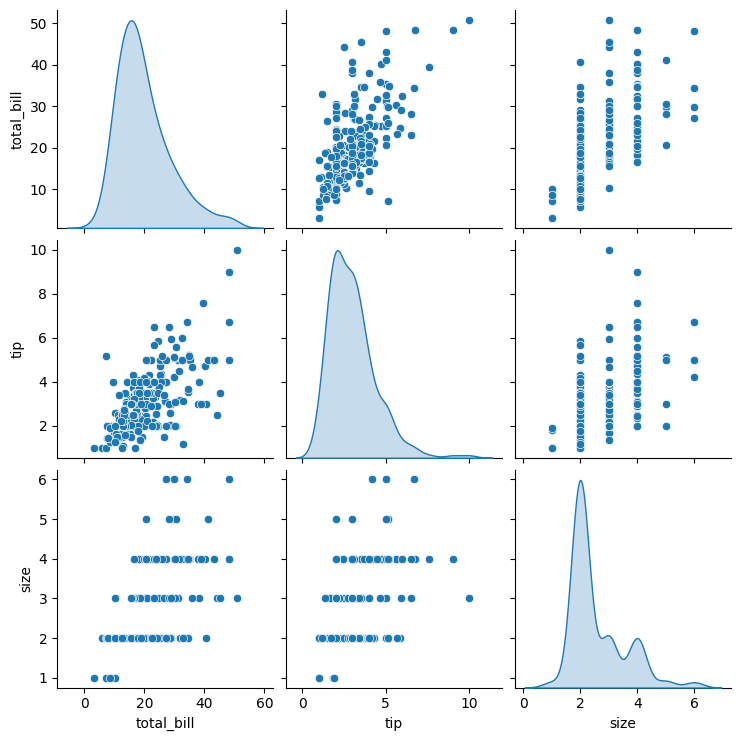

In [31]:
# Pair plot of predictors and target variable
sns.pairplot(data, diag_kind='kde')
plt.show()


## Correlation Matrix (Heatmap)

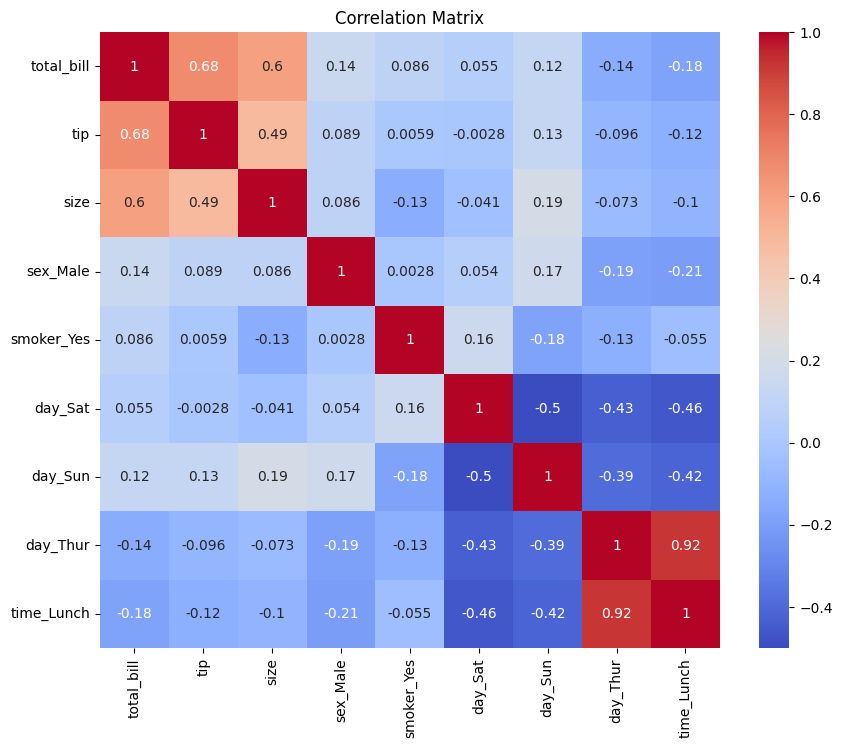

In [34]:
# Visualize correlations between features and the target variable
plt.figure(figsize=(10, 8))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Rainbow Test for Linearity 

In [39]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

# Assuming `data` is your DataFrame and 'tip' is the target variable
# Identify predictors and target variable
predictors = [col for col in data.columns if col != 'tip']
y = data['tip']

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(data[predictors], drop_first=True)

# Add a constant to X for the intercept
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Perform the Rainbow Test for linearity
rainbow_stat, rainbow_p_value = linear_rainbow(model)
print(f"Rainbow test statistic: {rainbow_stat}, p-value: {rainbow_p_value}")


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).